In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
import re

In [2]:
df = pd.read_csv('prev_total_score_emotion(tf_tokenizer_mecab).csv')

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3106: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.nunique()

업체명               3316
맛                   11
양                   11
배달                   6
주문메뉴            206951
고객id              1411
고객리뷰            233749
사장답글            252205
customer_len       308
owner_len          322
tf-idf          151013
glove           219310
SBERT           253321
고객감정              7052
사장감정              5037
공통감정              2145
dtype: int64

In [4]:
df['customer_len'] = df['고객리뷰'].str.len()
df['owner_len'] = df['사장답글'].str.len()

<AxesSubplot:xlabel='customer_len', ylabel='Count'>

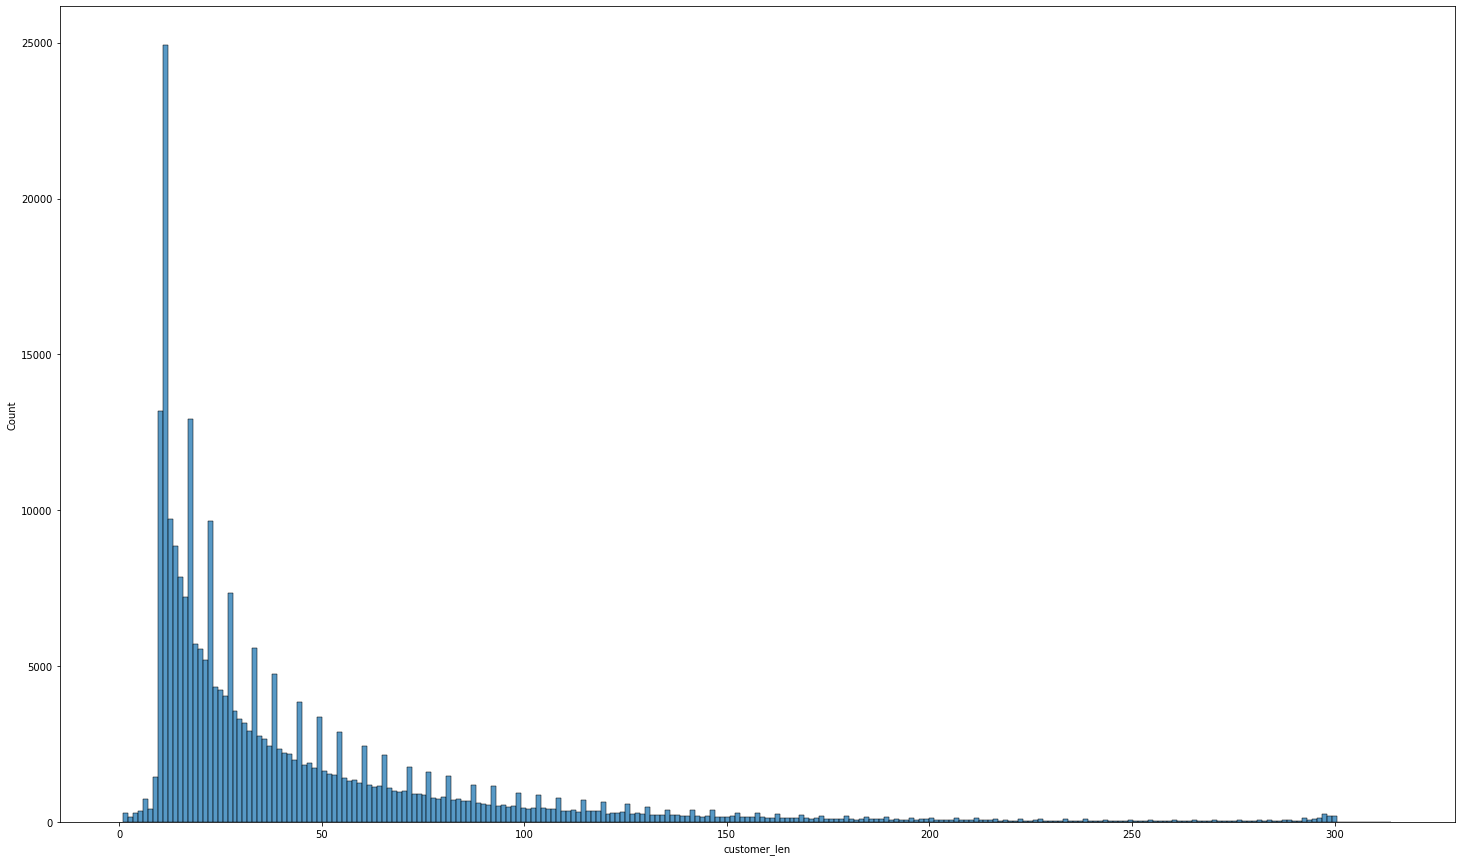

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(25, 15))
sns.histplot(x='customer_len', data=df, ax=ax)

In [6]:
df['customer_len'].describe()

count    256030.000000
mean         43.718443
std          45.717529
min           1.000000
25%          15.000000
50%          27.000000
75%          54.000000
max         314.000000
Name: customer_len, dtype: float64

<AxesSubplot:xlabel='owner_len', ylabel='Count'>

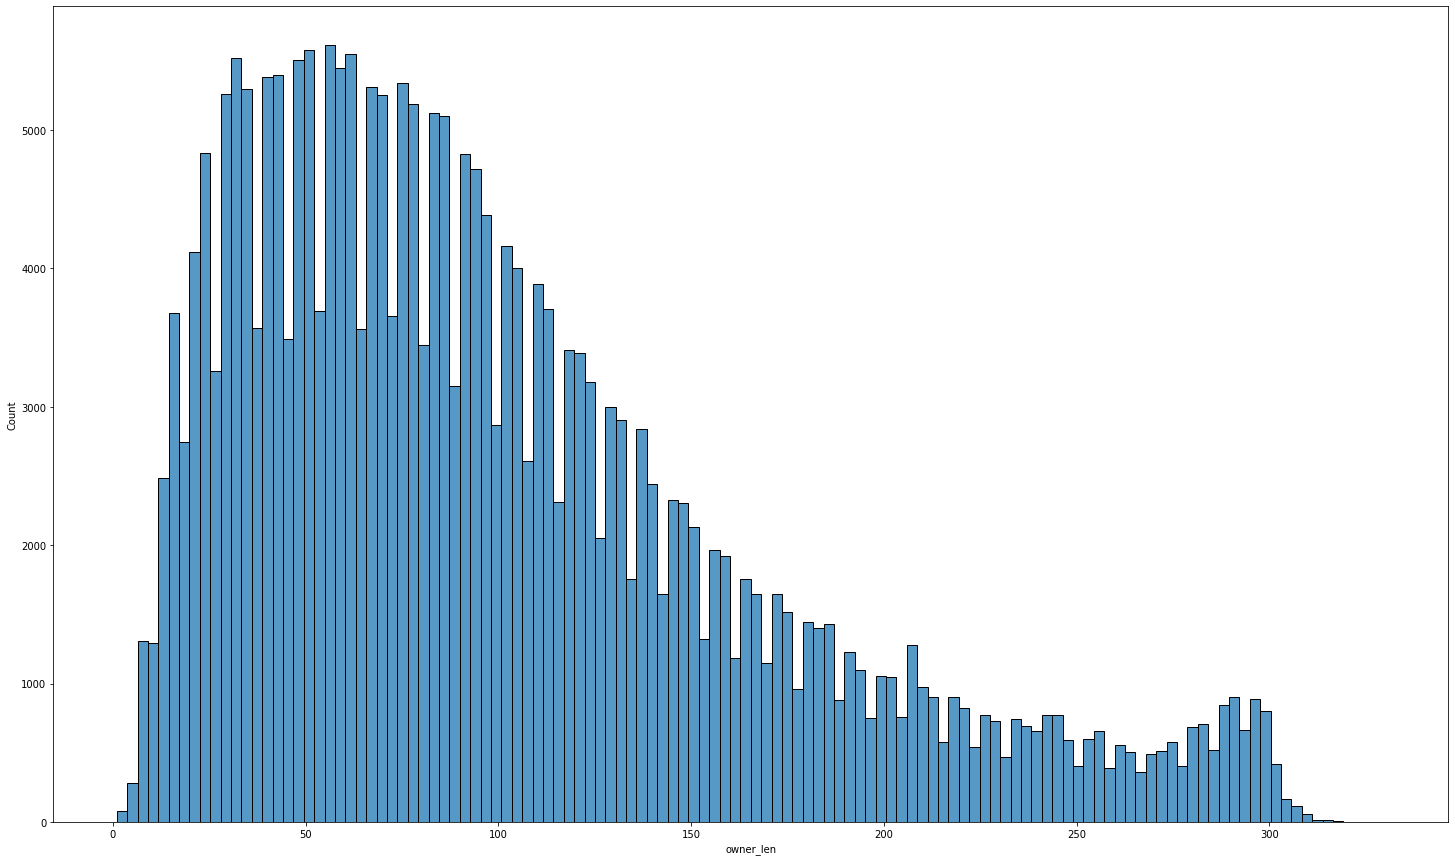

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(25, 15))
sns.histplot(x='owner_len', data=df, ax=ax)

In [8]:
df['owner_len'].describe()

count    256030.000000
mean        101.315057
std          67.818005
min           1.000000
25%          50.000000
50%          86.000000
75%         136.000000
max         330.000000
Name: owner_len, dtype: float64

In [9]:
count = 0
for idx, i in enumerate(df['사장답글']):
    if re.findall('[a-zA-Z]', str(i)):
        count += 1

print('영어가 포함된 문장: ', count)

영어가 포함된 문장:  15366


In [10]:
frequent_strings = ["고객님", "사진", "@", "ㅎ", "ㅠ", "ㅜ", "ㅋ", "손님"]
for i in frequent_strings:
    print(i)
    print("포함하는 문장수: ", sum(df['사장답글'].str.contains(i)))
    print("총 개수(중복 count): ", sum(df['사장답글'].str.count(i)), '\n')

고객님
포함하는 문장수:  75156
총 개수(중복 count):  99295 

사진
포함하는 문장수:  17639
총 개수(중복 count):  18846 

@
포함하는 문장수:  108231
총 개수(중복 count):  174885 

ㅎ
포함하는 문장수:  32606
총 개수(중복 count):  84254 

ㅠ
포함하는 문장수:  22049
총 개수(중복 count):  57185 

ㅜ
포함하는 문장수:  8037
총 개수(중복 count):  18649 

ㅋ
포함하는 문장수:  3423
총 개수(중복 count):  12137 

손님
포함하는 문장수:  2094
총 개수(중복 count):  2425 



In [11]:
from collections import Counter
c = Counter()
d = Counter()

for idx, i in enumerate(df['사장답글']):
    if re.findall('[^a-zA-Z0-9가-힣.,<>/?!@~*^ㅠㅜㅎ ]', i):
        c.update(re.findall('[^a-zA-Z0-9가-힣.,<>/?!@~*^ㅠㅜㅎ ]', i))
        d.update(set(re.findall('[^a-zA-Z0-9가-힣.,<>/?!@~*^ㅠㅜㅎ ]', i)))

print("포함하는 문장수: ",c.most_common(50))
print("총 개수(중복 count): ",d.most_common(50))

포함하는 문장수:  [('\n', 433948), ('#', 350198), ('️', 61481), (')', 52074), ('♡', 49990), ('❤', 49048), (':', 35142), ('-', 34127), ('♥', 34037), ('(', 21280), ('😊', 19633), ('😍', 19559), ('💕', 18620), ('👍', 18386), ('🥰', 15970), ('_', 14150), ('\u200d', 13266), ('⭐', 12577), ('=', 12248), ('ㅋ', 12137), ('\\', 11728), ('🏻', 10621), ('🤗', 9844), ('🙏', 9407), ('😆', 8569), ('━', 8132), ('♀', 7655), ('💛', 7473), ('🙇', 7456), ('🌟', 6818), (';', 6556), ('🧡', 6534), ('❣', 6471), ('😭', 6073), ('🔥', 6043), ('☺', 5821), ('ㅡ', 5785), ('😁', 5651), ('😘', 5521), ('•', 5441), ('😄', 5255), ('ㆍ', 5102), ('"', 4651), ("'", 4597), ('💖', 4518), ('🤩', 4317), ('💚', 4282), ('😉', 4186), ('😀', 4176), ('+', 4166)]
총 개수(중복 count):  [('\n', 156283), ('#', 108357), (')', 41704), (':', 29557), ('️', 29421), ('❤', 27092), ('♡', 27011), ('♥', 19389), ('(', 15941), ('😊', 15425), ('😍', 13754), ('🥰', 11842), ('💕', 11361), ('👍', 10472), ('\u200d', 9201), ('-', 8828), ('\\', 8084), ('🤗', 7647), ('_', 7524), ('🏻', 7408), ('😆', 

## 길이 및 유사도 전처리 + Train, Valid, Test 파일 split

In [12]:
count = 0
stores = []
delicious = []
quantity = []
deliver = []
menus = []
ids = []
reviews = []
owner = []
customer_len = []
owner_len = []
tfs = []
gloves = []
sberts = []
customer_emotion = []
onwer_emotion = []
intersections = []

for i in tqdm(range(len(df))):
    fs, ss, glove, sbert, tf = df['고객리뷰'].iloc[i], df['사장답글'].iloc[i], df['glove'].iloc[i], df['SBERT'].iloc[i], df['tf-idf'].iloc[i]
    if len(fs) > 15 and len(ss) > 50 and len(fs) < 100 and len(ss) < 200:
        if glove > 0.4 and sbert > 0.4:
            count += 1

            stores.append(df['업체명'].iloc[i])
            delicious.append(df['맛'].iloc[i])
            quantity.append(df['양'].iloc[i])
            deliver.append(df['배달'].iloc[i])
            menus.append(df['주문메뉴'].iloc[i])
            ids.append(df['고객id'].iloc[i])
            reviews.append(fs)
            customer_len.append(df['customer_len'].iloc[i])
            owner.append(ss)
            owner_len.append(df['owner_len'].iloc[i])
            gloves.append(glove)
            sberts.append(sbert)
            tfs.append(df['tf-idf'].iloc[i])
            customer_emotion.append(df['고객감정'].iloc[i])
            onwer_emotion.append(df['사장감정'].iloc[i])
            intersections.append(df['공통감정'].iloc[i])

temp = pd.DataFrame({'업체명':stores, '맛':delicious, '양':quantity, '배달':deliver, '주문메뉴':menus, '고객id':ids,  '고객리뷰':reviews, 'customer_len':customer_len, '사장답글':owner,
                     'owner_len':owner_len,'glove':gloves, 'SBERT':sberts, 'tf-idf':tfs, '고객감정':customer_emotion, '사장감정':onwer_emotion, '공통감정':intersections})
print(count)


81402


In [13]:
from sklearn.model_selection import train_test_split
import pandas as pd

def train_test_val_split(df, test_size=0.2, val_size=0.2):
    temp, test = train_test_split(df, test_size=test_size)
    total_items_count = len(df.index)
    val_length = total_items_count * val_size
    new_val_propotion = val_length / len(temp.index) 
    train, val = train_test_split(temp, test_size=new_val_propotion)
    return train, test, val

train, test, val = train_test_val_split(temp)

In [14]:
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)
val.to_csv('val.csv', index=False)